# Objective

Upon initial inspection of the data, we can start thinking of some questions about it that we would want to answer.

- What is the overall sales trend?

- Which are the Top 10 products by sales?

- Which are the Most Selling Products?

- Which is the most preferred Ship Mode?

- Which are the Most Profitable Category and Sub-Category?

<h4> IMPORTING REQUIRED LIBRARIES


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

<h4> IMPORTING THE DATASET

In [7]:
df = pd.read_excel('superstore_sales.xlsx')

<h4>DATA AUDIT

In [9]:
# First ten rows of the dataset
df.head(10)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011
5,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.342,1.80,Medium,2011
6,CA-2011-1510,2011-01-02,2011-01-06,Standard Class,Magdelene Morse,Consumer,Ontario,Canada,Canada,Canada,...,Technology,Machines,"Okidata Inkjet, Wireless",314.220,1,0.0,3.120,24.10,Medium,2011
7,IN-2011-79397,2011-01-03,2011-01-03,Same Day,Kean Nguyen,Corporate,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Appliances,"Hoover Microwave, White",276.102,1,0.1,110.412,125.32,Critical,2011
8,ID-2011-80230,2011-01-03,2011-01-09,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Technology,Copiers,"Hewlett Wireless Fax, Laser",912.456,4,0.4,-319.464,107.10,Low,2011
9,IZ-2011-4680,2011-01-03,2011-01-07,Standard Class,Lindsay Williams,Corporate,Ninawa,Iraq,EMEA,EMEA,...,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",666.840,4,0.0,253.320,81.26,High,2011


In [11]:
# Last ten rows of the dataset
df.tail(10)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51280,TZ-2014-8220,2014-12-31,2015-01-06,Standard Class,Christine Kargatis,Home Office,Dar Es Salaam,Tanzania,Africa,Africa,...,Office Supplies,Labels,"Harbour Creations Removable Labels, Adjustable",49.500,6,0.0,6.8400,2.150,Medium,2014
51281,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750,2.060,Medium,2014
51282,UP-2014-4410,2014-12-31,2015-01-04,Standard Class,Guy Thornton,Consumer,Zaporizhzhya,Ukraine,EMEA,EMEA,...,Office Supplies,Labels,"Avery Round Labels, Alphabetical",27.840,4,0.0,6.1200,1.700,Medium,2014
51283,IN-2014-23754,2014-12-31,2015-01-07,Standard Class,Kalyca Meade,Corporate,Guangdong,China,APAC,North Asia,...,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.470,3,0.0,25.3800,1.410,Medium,2014
51284,MX-2014-108574,2014-12-31,2015-01-04,Standard Class,Julia Barnett,Home Office,Tamaulipas,Mexico,LATAM,North,...,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.740,3,0.0,0.6600,1.324,Medium,2014
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [12]:
# Shape of the dataset
df.shape

(51290, 21)

In [13]:
# Coloumns present in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [14]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [15]:
# Checking missing values
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

Next, we can look at some descriptive statistics of the data frame with the describe method.

This shows some descriptive statistics on the data set. Notice, it only shows the statistics on the numerical columns. From here you can see the following statistics:

- Row count, which aligns to what the shape attribute showed us.
- The mean, or average.
- The standard deviation, or how spread out the data is.
- The minimum and maximum value of each column
- The number of items that fall within the first, second, and third percentiles.

In [16]:
# Getting descriptive ststistics Summary
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931


<h3> EXPLORATORY DATA ANALYSIS

<h4> WHAT IS THE OVERALL SALES TREND?

In [27]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [28]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [25]:
# Getting month year from order_date
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [32]:
# grouping month_year by sales
df_temp = df.groupby('month_year')['sales'].sum().reset_index()

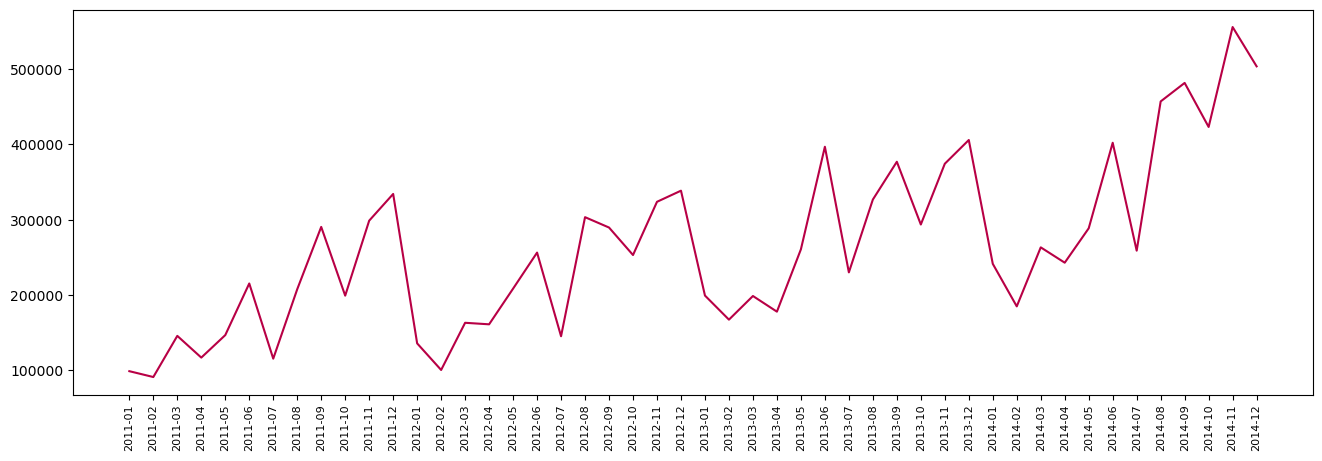

In [33]:
# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(df_temp['month_year'], df_temp['sales'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

<h4> WHICH ARE THE TOP 10 PRODUCTS BY SALES?

In [38]:
# Grouping products by sales
prod_sales = df.groupby('product_name')['sales'].agg('sum').reset_index()

In [39]:
# Sorting the dataframe in descending order
prod_sales.sort_values(by=['sales'], inplace=True, ascending=False)

In [40]:
# Top 10 products by sales
prod_sales[:10]

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


<h4> WHICH ARE THE MOST SELLING PRODUCTS?

In [42]:
# Grouping products by Quantity
best_selling_prods = df.groupby('product_name')['quantity'].agg('sum').reset_index()

In [43]:
# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['quantity'], inplace=True, ascending=False)

In [44]:
# Most selling products
best_selling_prods[:10]

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


<h4> WHAT IS THE MOST PREFERRED SHIP MODE?

In [49]:
# Setting the figure size
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='ship_mode', ylabel='count'>

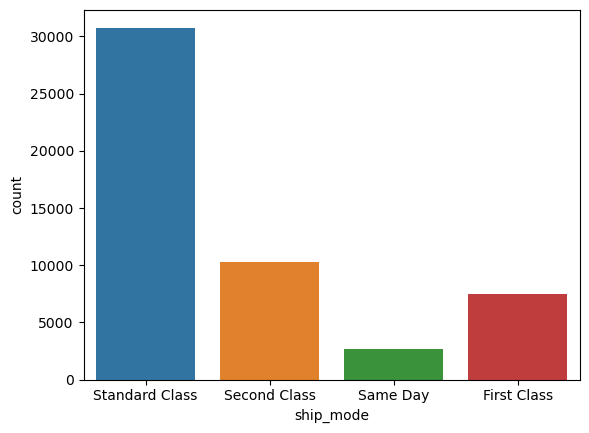

In [46]:
# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='ship_mode', data=df)

<h4> WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?

In [51]:
# Grouping products by Category and Sub-Category
cat_subcat = df.groupby(['category', 'sub_category'])['profit'].agg('sum').reset_index()

In [52]:
# Sorting the values
cat_subcat.sort_values(['category','profit'], ascending=False)

,category,sub_category,profit
14,Technology,Copiers,258567.54818
16,Technology,Phones,216717.00580
13,Technology,Accessories,129626.30620
15,Technology,Machines,58867.87300
4,Office Supplies,Appliances,141680.58940
11,Office Supplies,Storage,108461.48980
6,Office Supplies,Binders,72449.84600
10,Office Supplies,Paper,59207.68270
5,Office Supplies,Art,57953.91090
7,Office Supplies,Envelopes,29601.11630


#                                End